## Data pull, parsing and preliminary modeling
#### CS109a - Sam, Luke, Jake, Jeremy
#### Chicago Food Inspection Forecasting
#### Last Updated: 11/28/16

In [1]:
from download import main

In [1]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
main(date=datetime.datetime.strptime('01/01/2010', '%m/%d/%Y'), export=True)

Fetching data beginning 2010-01-01.
136974 records received. Finding businesses...
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
{u'errorCode': u'query.soql.type-mismatch', u'message': u'Query coordinator error: query.soql.type-mismatch; Type mismatch for #IN, is text; position: Map(row -> 1, column -> 2784, line -> "SELECT * WHERE `license_number` IN (\'1820865\',\'1619259\',\'2042643\',\'1820627\',\'1771894\',\'8085\',\'2088691\',\'2088692\',\'2088693\',\'2088695\',\'2088696\',\'2240915\',\'2240917\',\'2443436\',\'2240918\',\'25179\',\'25174\',\'25176\',\'1681317\',\'1954173\',\'1717915\',\'2103970\',\'1842888\',\'1144531\',\'1227415\',\'2397791\',\'2084445\',\'16308\',\'2069477\',\'2069473\',\'16301\',\'16300\',\'16303\',\'16305\',\'1444085\',\'1444088\',\'1141842\',\'1092321\',\'2378636\',\'69645\',\'1873335\',\'2364154\',\'2364151\',\'2156746\',\'2156747\',\'1352154\',\'21211\',\'21215\',\'2411791\',\'1858\',\'1142576\',\'81024\

/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,dba_name,facility_type,inspection_date,inspection_type,inspection_id,violations,latitude,license_,longitude,results,...,creation_date,num_sanitation_in_police_dist,index,district,crime_count_by_district,date,near_x,near_y,point_crime_count,point_sanit_count
0,TRATTORIA ISABELLA,Restaurant,2012-04-06,Canvass,1184245,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.886294,1842843,-87.642644,Pass,...,NaT,NaN,28568.0,12.0,41.0,2012-04-06,41.870507,-87.636333,7.470854e-05,NaN
1,GREAT AMERICAN BAGEL,Restaurant,2014-10-09,Canvass,1441489,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.939911,1898062,-87.660833,Fail,...,NaT,NaN,44617.0,19.0,30.0,2014-10-09,41.945785,-87.636333,1.527434e-05,NaN
2,ALBANY PARK COMMUNITY CENTER,Children's Services Facility,2015-09-09,License,1575282,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.970113,2215517,-87.713443,Pass,...,2015-09-09,7.0,39908.0,17.0,23.0,2015-09-09,41.983425,-87.691952,1.603135e-05,0.000022
3,Pritzker,School,2010-12-02,Canvass,469703,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.907025,25871,-87.677796,Pass w/ Conditions,...,NaT,NaN,335.0,1.0,30.0,2010-12-02,41.908146,-87.691952,2.113810e-04,NaN
4,DOCKS,Restaurant,2014-01-14,Short Form Complaint,1296751,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.736380,1445981,-87.627509,Pass,...,2014-01-14,1.0,14084.0,6.0,47.0,2014-01-14,41.719949,-87.636333,2.340951e-05,NaN
5,BABA'S FAMOUS STEAK & LEMONADE,Restaurant,2010-10-14,Canvass,417230,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.802134,1954887,-87.621203,Pass,...,NaT,NaN,2808.0,2.0,31.0,2010-10-14,41.795228,-87.636333,2.888950e-04,0.000000
6,JERSEY MIKE'S,Restaurant,2014-04-11,Canvass,1439241,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.892453,2120697,-87.622491,Pass,...,2014-04-11,3.0,41914.0,18.0,31.0,2014-04-11,41.908146,-87.636333,3.014362e-05,0.000083
7,YOSHI'S CAFE,Restaurant,2013-10-22,Canvass Re-Inspection,1369883,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.941696,2115,-87.649177,Pass,...,2013-10-22,4.0,44265.0,19.0,29.0,2013-10-22,41.945785,-87.636333,2.065912e-05,0.000075
8,DIPPIN' DOTS ICE CREAM,Mobile Food Preparer,2013-08-14,License Re-Inspection,1360265,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.887434,2220008,-87.681849,Pass,...,2013-08-14,3.0,29063.0,12.0,42.0,2013-08-14,41.870507,-87.691952,6.012352e-05,0.000020
9,THE WATERFORD A NURSING & REHABILITATION CENTRE,Long Term Care,2010-03-02,Canvass,176448,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",42.017571,43055,-87.665385,Pass w/ Conditions,...,NaT,NaN,50502.0,24.0,23.0,2010-03-02,42.021064,-87.691952,3.570408e-04,0.000000


First we load in the data:

**NOTE: SWAP result binary later**

In [1]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/DOWNLOADED_DATA.csv')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
result_possibilities = ['Pass', 'Fail', 'Pass w/ Conditions']
valid_result_bools = [result in result_possibilities for result in data.results]
data = data[valid_result_bools]

In [3]:
def fail(result):
    if 'Fail' in result:
        return 1
    else:
        return 0
    
    
def grocery_store(facility_type):
    if 'Grocery Store' == facility_type:
        return 1
    else:
        return 0

In [4]:
data['result_binary'] = [fail(result) for result in data.results]
data['grocery'] = [grocery_store(facility_type) for facility_type in data.facility_type]

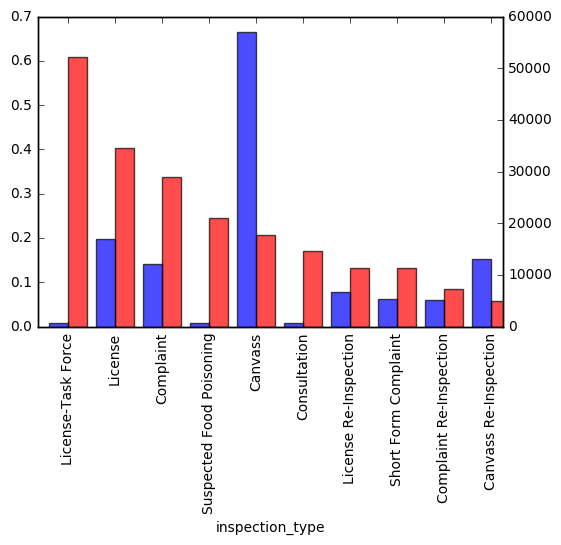

In [5]:
top_inspection_types = data.groupby('inspection_type').count().result_binary.sort_values(ascending=False).index[:10]
top_inspection_types_sorted = data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).index

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
data.groupby('inspection_type').count().result_binary[top_inspection_types_sorted].plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)

In [6]:
inspection_type_dummies = pd.get_dummies(data['inspection_type'])
inspection_type_dummies = inspection_type_dummies[top_inspection_types]


data = pd.concat([data,inspection_type_dummies],axis=1,join='inner')

In [7]:


biz_cols = []
for col in data.columns:
    if 'business_activity' in col:
        biz_cols.append(col)
        
count = []
mean = []
for col in biz_cols:
    count.append(data[data[col] == 1].result_binary.mean())
    mean.append(len(data[data[col] == 1].result_binary))

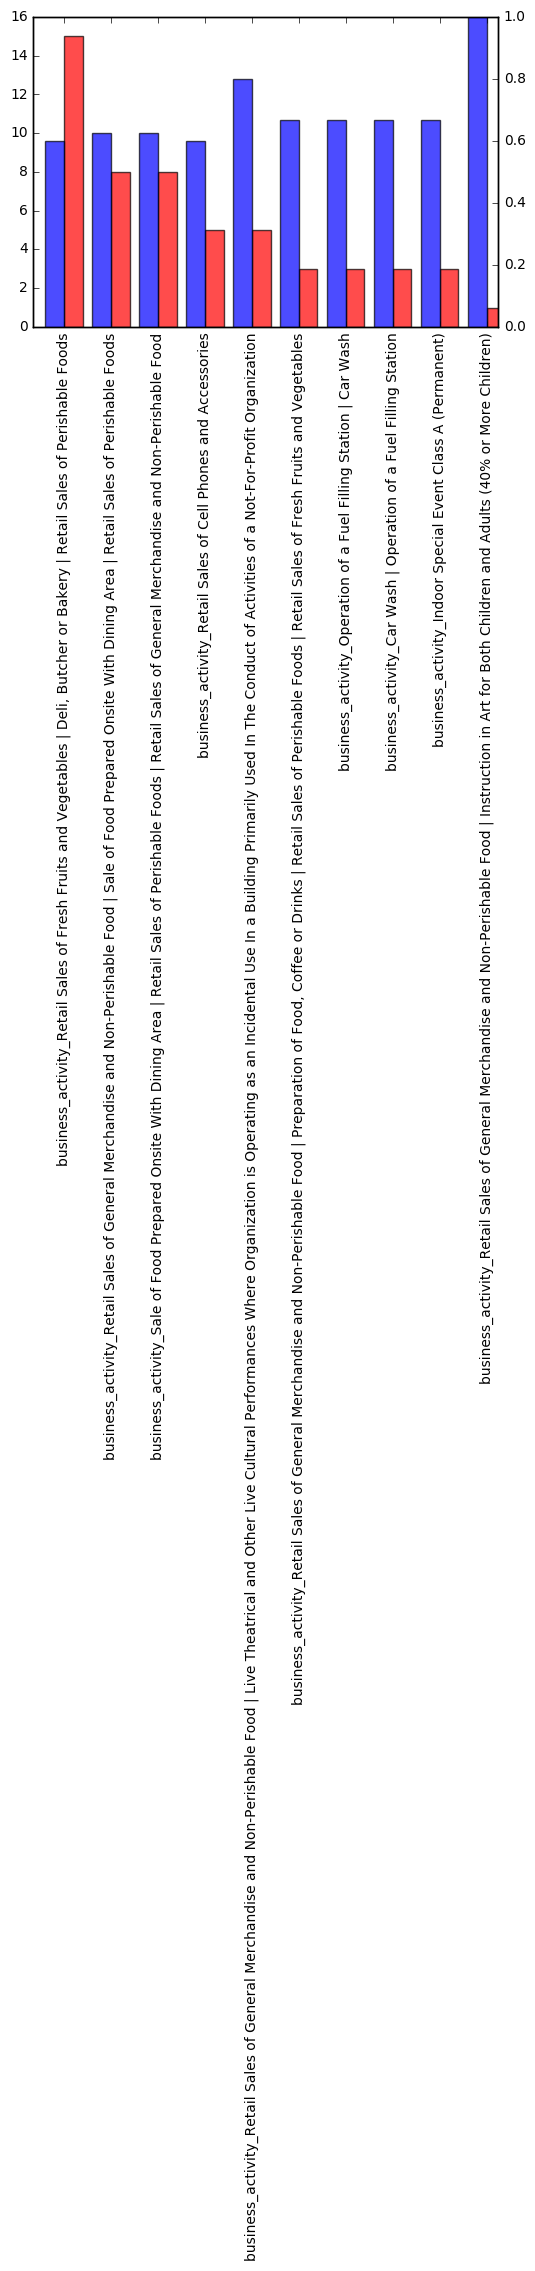

In [8]:
biz_cols_mean = pd.Series(mean,biz_cols)
biz_cols_count = pd.Series(count,biz_cols)

biz_cols_count_top = biz_cols_count.sort_values(ascending=False).index[:10]


biz_col_mean_sorted = biz_cols_mean[biz_cols_count_top].sort_values(ascending=False).index

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

biz_cols_mean[biz_col_mean_sorted].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
biz_cols_count[biz_col_mean_sorted].plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)

In [9]:

biz_cols_counts = data[biz_cols].sum().sort_values()


pass_rate = []
count = []
for col in biz_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    
    
top_n = 20
top_license_counts = biz_cols_counts.ix[biz_cols_counts.index[-top_n:]]

top_biz_counts_cols = list(biz_cols_counts.index[-top_n:])

pass_rate = []
for col in top_biz_counts_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    
top_biz_pass_rate = pd.Series(data = np.array(pass_rate),index=top_biz_counts_cols)

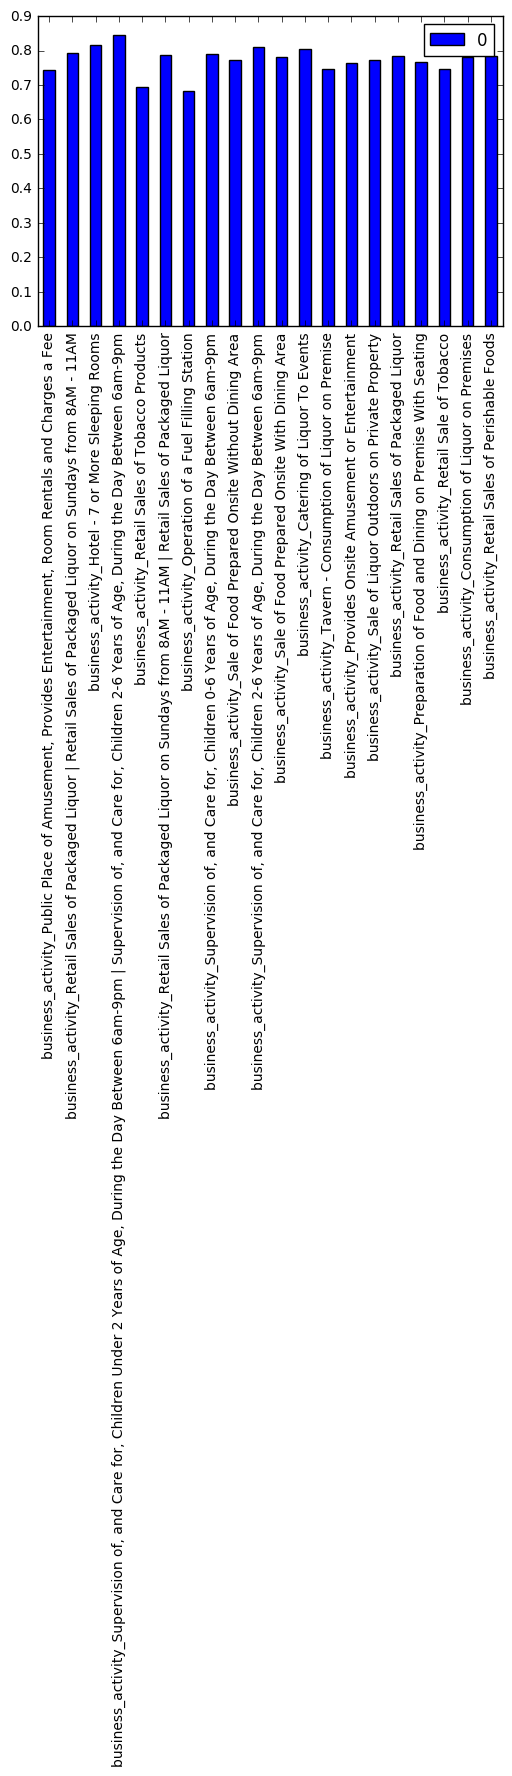

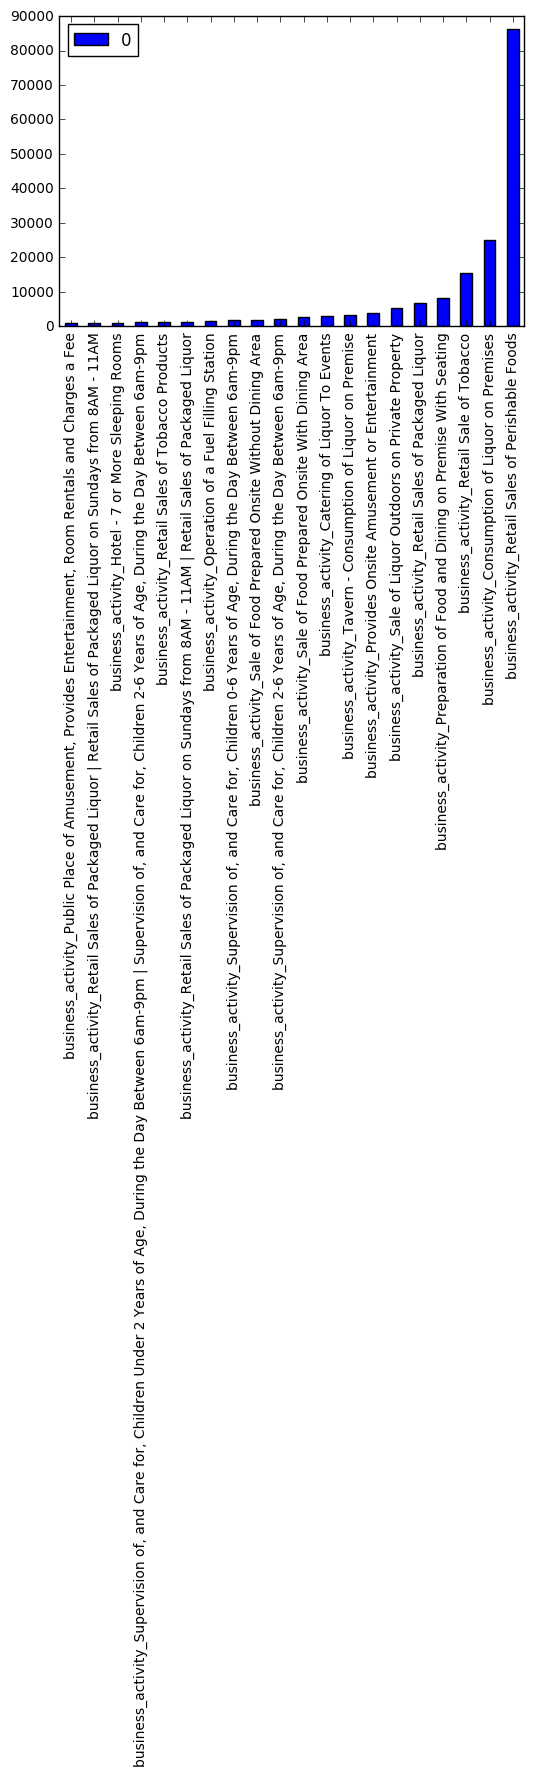

In [10]:
pd.DataFrame(1-top_biz_pass_rate).plot(kind='bar')
plt.show()
pd.DataFrame(top_license_counts).plot(kind='bar')
plt.show()

In [11]:
keep_n=5
all_license_cols = list(biz_cols)
for col in list(biz_cols_counts.index[-keep_n:]):
    all_license_cols.remove(col)

drop_license_cols = all_license_cols
data = data.drop(drop_license_cols,axis=1)

In [12]:
data['inspection_date'] = pd.to_datetime(data['inspection_date'])
#data['license_start_date'] = pd.to_datetime(data['license_start_date'])
#data['date_issued'] = pd.to_datetime(data['date_issued'])
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [13]:
# weather_data_ohare = pd.read_csv('Ohare Weather Data.csv')
# weather_data_midway = pd.read_csv('Midway Weather Data.csv')
weather_data_ohare = pd.read_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/Ohare Weather Data.csv')
weather_data_midway = pd.read_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/Midway Weather Data.csv')

weather_data_ohare['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_ohare.DATE]
weather_data_midway['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_midway.DATE]
temp_data_ohare = weather_data_ohare.set_index(['inspection_date'])[['TMAX']]
temp_data_midway = weather_data_midway.set_index(['inspection_date'])[['TMAX']]

temp_data_ohare['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,3)
temp_data_ohare['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,10)
temp_data_ohare['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,30)

temp_data_midway['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,3)
temp_data_midway['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,10)
temp_data_midway['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,30)
data = data.join(temp_data_midway, on='inspection_date')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated 

In [14]:
import re

critical_flags = re.compile(r'(\bCRITICAL\b)',flags = re.IGNORECASE)
serious_flags = re.compile(r'(\bSERIOUS\b)',flags = re.IGNORECASE)
citation_flags = re.compile(r'(\bCITATION\b)',flags = re.IGNORECASE)
violation_flags = re.compile(r'(\bVIOLATION\b)',flags = re.IGNORECASE)
minor_flags = re.compile(r'(\bMINOR\b)',flags = re.IGNORECASE)
corrected_flags = re.compile(r'(\bCORRECTED\b)',flags = re.IGNORECASE)


In [15]:
violations_count = []
citations_count = []
critical_count = []
serious_count = []
minor_count = []
corrected_count = []

LOG_EVERY_N = 10000


  
for index in data.index:
    text = data.ix[index].violations
    
    if type(text) == type(' '):
        violations_count.append(violation_flags.subn('',text)[1])
        citations_count.append(citation_flags.subn('',text)[1])
        critical_count.append(critical_flags.subn('',text)[1])
        serious_count.append(serious_flags.subn('',text)[1])
        minor_count.append(minor_flags.subn('',text)[1])
        corrected_count.append(corrected_flags.subn('',text)[1])


    else:
        violations_count.append(float('nan'))
        citations_count.append(float('nan'))
        critical_count.append(float('nan'))
        serious_count.append(float('nan'))
        minor_count.append(float('nan'))
        corrected_count.append(float('nan'))

        
    if (index % LOG_EVERY_N) == 0:
        print index


0
20000
30000
50000
60000
70000
80000
90000
100000
120000
130000


In [16]:
data['violations_count'] = violations_count
data['citations_count'] = citations_count
data['critical_count'] = critical_count
data['serious_count'] = serious_count
data['minor_count'] = minor_count
data['corrected_count'] = corrected_count




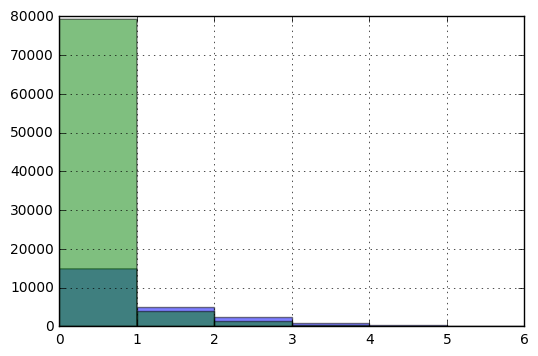

In [17]:
# compare pass rates for different violation counts
bins = np.linspace(0,6,7)
data[data.result_binary == 1].citations_count.hist(normed=False,alpha=0.5,bins=bins)
data[data.result_binary == 0].citations_count.hist(normed=False,alpha=0.5,bins=bins)

In [18]:
def prev_inspection_features(data,inspection_id,date):
    current_inspection = data.ix[data[data.inspection_id==inspection_id].index[0]]
    
    all_inspections = data[data.license_ == current_inspection.license_]
    
    previous_inspections = all_inspections[all_inspections.inspection_date < date]
    if len(previous_inspections) >= 1:
        last_inspection_index = previous_inspections.inspection_date.sort_values().index[-1]
        fraction = previous_inspections.result_binary.mean()
        count = previous_inspections.result_binary.count()
        last = previous_inspections.result_binary[last_inspection_index]
        
        #if type(pd.to_datetime('nan')) != type(current_inspection.license_start_date):
        #    license_age = current_inspection.inspection_date - current_inspection.license_start_date
        #    license_age = license_age.days
        #    if license_age <= 0:
        #        license_age = 0
        #else:
        #    license_age = float('nan')
            
        time_since_last = current_inspection.inspection_date - previous_inspections.ix[last_inspection_index].inspection_date
        time_since_last = time_since_last.days
        
        prev_violations = previous_inspections.violations_count[last_inspection_index]
        prev_citations = previous_inspections.citations_count[last_inspection_index]
        prev_critical = previous_inspections.critical_count[last_inspection_index]
        prev_serious = previous_inspections.serious_count[last_inspection_index]
        prev_minor = previous_inspections.minor_count[last_inspection_index]
        prev_corrected = previous_inspections.corrected_count[last_inspection_index]

        
        
        
    else:
        fraction = float('nan')
        count = 0
        last = float('nan')
        license_age = float('nan')
        time_since_last = float('nan')
        prev_violations = float('nan')
        prev_citations = float('nan')
        prev_critical = float('nan')
        prev_serious = float('nan')
        prev_minor = float('nan')
        prev_corrected = float('nan')

        
        
        
        
    return np.array([count,
                     fraction,
                     last,
                     #license_age,
                     time_since_last,
                     prev_violations,
                     prev_citations,
                     prev_critical,
                     prev_serious,
                     prev_minor,
                     prev_corrected])
    
    


In [19]:
#previous_inspection_features = np.zeros((len(data.index),11))

previous_inspection_features = np.zeros((len(data.index),10))


LOG_EVERY_N = 10000
for i in range(len(data.index)):
    index = data.index[i]
    previous_inspection_features[i,:] = prev_inspection_features(data,data.ix[index].inspection_id,data.ix[index].inspection_date)
    if (index % LOG_EVERY_N) == 0:
        print index


0
20000
30000
50000
60000
70000
80000
90000
100000
120000
130000


In [20]:
    
data['previous_count'] = previous_inspection_features[:,0]
data['previous_fraction'] = previous_inspection_features[:,1]
data['previous_result'] = previous_inspection_features[:,2]
#data['license_age'] = previous_inspection_features[:,3]
data['time_since_last_inspection'] = previous_inspection_features[:,3]
data['previous_violations'] = previous_inspection_features[:,4]
data['previous_citations'] = previous_inspection_features[:,5]
data['previous_critical'] = previous_inspection_features[:,6]
data['previous_serious'] = previous_inspection_features[:,7]
data['previous_minor'] = previous_inspection_features[:,8]
data['previous_corrected'] = previous_inspection_features[:,9]



In [21]:
for col in data.columns:
    print col

dba_name
facility_type
inspection_date
inspection_type
inspection_id
violations
latitude
license_
longitude
results
risk
zip
police_district
precinct
account_number
site_number
ward_precinct
business_activity_Consumption of Liquor on Premises
business_activity_Preparation of Food and Dining on Premise With Seating
business_activity_Retail Sale of Tobacco
business_activity_Retail Sales of Packaged Liquor
business_activity_Retail Sales of Perishable Foods
creation_date
num_sanitation_in_police_dist
index
district
crime_count_by_district
date
near_x
near_y
point_crime_count
point_sanit_count
result_binary
grocery
Canvass
License
Canvass Re-Inspection
Complaint
License Re-Inspection
Short Form Complaint
Complaint Re-Inspection
Suspected Food Poisoning
Consultation
License-Task Force
TMAX
TMAX_3DayAvg
TMAX_10DayAvg
TMAX_30DayAvg
violations_count
citations_count
critical_count
serious_count
minor_count
corrected_count
previous_count
previous_fraction
previous_result
time_since_last_inspectio

In [22]:
data.to_csv('data_built_features.csv',index=False)


In [23]:
data.to_csv('BACKUP.csv',index=False)

In [ ]:

#adjust number of buckets using np.linspace ----------------->
yedges = np.linspace(data.longitude.min(),data.longitude.max(),6)
xedges = np.linspace(data.latitude.min(),data.latitude.max(),6)

x = np.array(data.latitude)
y = np.array(data.longitude)

x1 = np.array(data[data.result_binary == 1].latitude)
y1 = np.array(data[data.result_binary == 1].longitude)

x0 = np.array(data[data.result_binary == 0].latitude)
y0 = np.array(data[data.result_binary == 0].longitude)


hist0, xedges, yedges = np.histogram2d(x0, y0, (xedges, yedges))
hist1, xedges, yedges = np.histogram2d(x1, y1, (xedges, yedges))

hist = hist0/(hist1+hist0)
hist_count = hist1+hist0

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)

c = hist[xidx, yidx]
plt.scatter(x, y, c=c)

plt.show()

sorted_index = np.argsort(hist.reshape(1,-1))

print hist_count.reshape(1,-1)[0][sorted_index[0]]
print hist.reshape(1,-1)[0][sorted_index[0]]

In [ ]:
data['bin_index'] = hist.shape[1]*yidx + xidx

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('bin_index').count().result_binary.plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('bin_index').mean().result_binary.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()

In [ ]:
result_index = data.groupby('license_description').mean().result_binary.sort_values().index
data.groupby('license_description').mean().result_binary.sort_values()[result_index]

In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('license_description').count().result_binary[result_index].plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('license_description').mean().result_binary.sort_values()[result_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()



In [ ]:
top_50 = data.groupby('facility_type').count().result_binary.sort_values().index[-50:]

In [ ]:
data.groupby('facility_type').mean().result_binary[top_50].sort_values()

top_50count_mean_sorted_index = data.groupby('facility_type').mean().result_binary[top_50].sort_values().index



In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('facility_type').mean().result_binary[top_50].sort_values().plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('facility_type').count().result_binary[top_50count_mean_sorted_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()


## Modeling
#### All shit above is Luke's work

### Get data and desired features

In [3]:
# data = pd.read_csv('../data_built_features.csv')

In [48]:
# data.shape

(120308, 64)

In [24]:
for col in data.columns.values:
    print col

dba_name
facility_type
inspection_date
inspection_type
inspection_id
violations
latitude
license_
longitude
results
risk
zip
police_district
precinct
account_number
site_number
ward_precinct
business_activity_Consumption of Liquor on Premises
business_activity_Preparation of Food and Dining on Premise With Seating
business_activity_Retail Sale of Tobacco
business_activity_Retail Sales of Packaged Liquor
business_activity_Retail Sales of Perishable Foods
creation_date
num_sanitation_in_police_dist
index
district
crime_count_by_district
date
near_x
near_y
point_crime_count
point_sanit_count
result_binary
grocery
Canvass
License
Canvass Re-Inspection
Complaint
License Re-Inspection
Short Form Complaint
Complaint Re-Inspection
Suspected Food Poisoning
Consultation
License-Task Force
TMAX
TMAX_3DayAvg
TMAX_10DayAvg
TMAX_30DayAvg
violations_count
citations_count
critical_count
serious_count
minor_count
corrected_count
previous_count
previous_fraction
previous_result
time_since_last_inspectio

In [25]:
# we should return to this and check which covariates we've selected 

cols = ['inspection_date',
        'facility_type',
        'latitude',
        'longitude',
        'results',
        'risk',
        'business_activity_Consumption of Liquor on Premises',
        'business_activity_Preparation of Food and Dining on Premise With Seating',
        'business_activity_Retail Sale of Tobacco',
        'business_activity_Retail Sales of Packaged Liquor',
        'business_activity_Retail Sales of Perishable Foods',
        'Canvass', # inspection_type
        'License',
        'Canvass Re-Inspection',
        'Complaint',
        'License Re-Inspection',
        'Short Form Complaint',
        'Complaint Re-Inspection',
        'Suspected Food Poisoning',
        'Consultation',
        'License-Task Force',
        'point_crime_count',
        'point_sanit_count',
        'result_binary',
        'TMAX',
        'TMAX_3DayAvg',
        'TMAX_10DayAvg',
        'TMAX_30DayAvg',
        'previous_count',
        'previous_fraction',
        'previous_result',
        'time_since_last_inspection',
        'previous_violations',
        'previous_citations',
        'previous_critical',
        'previous_serious',
        'previous_minor',
        'previous_corrected']

print data[cols].shape
print data.shape

# select specific features
data_sub = data[cols]
# what would happen if we dropped NaNs
print data_sub.dropna(axis=0, how='any').shape

(120308, 38)
(120308, 64)
(61493, 38)


In [26]:
data_sub = data_sub.copy()

In [27]:
# temporary -- dumping correct crime data and sanitation complaint data into dataset
data_dump = pd.read_csv('../data_with_crime_sanit.csv')

In [28]:
data_sub['crime'] = data_dump['crime'].copy()
data_sub['sanit'] = data_dump['sanitation'].copy()

In [29]:
# convert string to datetime to be safe
data_sub['inspection_date'] = pd.to_datetime(data_sub['inspection_date'])

print data_sub['inspection_date'].min()
print data_sub['inspection_date'].max()


2010-01-04 00:00:00
2016-12-02 00:00:00


### Imputation and encoding 

In [30]:
# non-KNN approach:
# replace null values with feature mean (quantitative) or feature mode (qualitative)
# for column in data_sub.columns:
#     if (data_sub[column].unique().shape[0] < 8) or (data_sub[column].dtype == np.dtype('object')):
#         data_sub[column].fillna(value = data_sub[column].mode()[0], inplace = True)
#     else:
#         data_sub[column].fillna(value = data_sub[column].mean(), inplace = True)

# check no null values
nan_cnt = 0
for i, column in enumerate(data_sub.columns):
    print i, column, np.array(data_sub[column].isnull()).sum()
    nan_cnt = nan_cnt + np.array(data_sub[column].isnull()).sum()
    
print 'total cells:', data_sub.size
print 'nan_cnt:', nan_cnt
print 'ratio for sam:', nan_cnt / float(data_sub.size)



0 inspection_date 0
1 facility_type 640
2 latitude 460
3 longitude 460
4 results 0
5 risk 38
6 business_activity_Consumption of Liquor on Premises 7205
7 business_activity_Preparation of Food and Dining on Premise With Seating 7205
8 business_activity_Retail Sale of Tobacco 7205
9 business_activity_Retail Sales of Packaged Liquor 7205
10 business_activity_Retail Sales of Perishable Foods 7205
11 Canvass 0
12 License 0
13 Canvass Re-Inspection 0
14 Complaint 0
15 License Re-Inspection 0
16 Short Form Complaint 0
17 Complaint Re-Inspection 0
18 Suspected Food Poisoning 0
19 Consultation 0
20 License-Task Force 0
21 point_crime_count 2208
22 point_sanit_count 18266
23 result_binary 0
24 TMAX 17440
25 TMAX_3DayAvg 17440
26 TMAX_10DayAvg 17732
27 TMAX_30DayAvg 18690
28 previous_count 0
29 previous_fraction 26924
30 previous_result 26924
31 time_since_last_inspection 26924
32 previous_violations 33687
33 previous_citations 33687
34 previous_critical 33687
35 previous_serious 33687
36 previou

In [31]:
# how should we handle the historical count data?
# there's no optimal solution: either (1) impute, biasing that they wouldn't have done well 
# or (2) set to 0, biasing that they would've done well? We'll set to 0 for simplicity.

print 'count of obs for which previous_count == 0:', data_sub[data_sub['previous_count'] == 0.0].shape[0]
print 'this corresponds with number of nans for previous_fraction, previous_result, time_since_last_inspection, which is what we\'d expect'

# set all these to 0 then
hist_cols = ['previous_fraction',
            'previous_result',
            'time_since_last_inspection',
            'previous_violations',
            'previous_citations',
            'previous_critical',
            'previous_serious',
            'previous_minor',
            'previous_corrected']

for hist_col in hist_cols:
    data_sub.loc[data_sub['previous_count'] == 0.0, hist_col] = data_sub.loc[data_sub['previous_count'] == 0.0, hist_col].fillna(value = 0)
    
print '\n here are NaN counts after this step: \n'
for i, column in enumerate(data_sub.columns):
    print i, column, np.array(data_sub[column].isnull()).sum()
    
print '37-42 still have a uniform number of null values because they had no text from the inspection, so nothing to scrape'

count of obs for which previous_count == 0: 26924
this corresponds with number of nans for previous_fraction, previous_result, time_since_last_inspection, which is what we'd expect

 here are NaN counts after this step: 

0 inspection_date 0
1 facility_type 640
2 latitude 460
3 longitude 460
4 results 0
5 risk 38
6 business_activity_Consumption of Liquor on Premises 7205
7 business_activity_Preparation of Food and Dining on Premise With Seating 7205
8 business_activity_Retail Sale of Tobacco 7205
9 business_activity_Retail Sales of Packaged Liquor 7205
10 business_activity_Retail Sales of Perishable Foods 7205
11 Canvass 0
12 License 0
13 Canvass Re-Inspection 0
14 Complaint 0
15 License Re-Inspection 0
16 Short Form Complaint 0
17 Complaint Re-Inspection 0
18 Suspected Food Poisoning 0
19 Consultation 0
20 License-Task Force 0
21 point_crime_count 2208
22 point_sanit_count 18266
23 result_binary 0
24 TMAX 17440
25 TMAX_3DayAvg 17440
26 TMAX_10DayAvg 17732
27 TMAX_30DayAvg 18690
28 pre

In [32]:
# obs with no null values
print 'count of obs with no null values:', data_sub.shape[0] - data_sub.isnull().any(axis = 1).sum()
print 'count of features with no null values:', data_sub.shape[1] - data_sub.isnull().any(axis = 0).sum()

count of obs with no null values: 63329
count of features with no null values: 17


In [33]:
# features with no null values we can use to impute
data_sub.isnull().any(axis = 0)[data_sub.isnull().any(axis = 0) == False].index.values

array(['inspection_date', 'results', 'Canvass', 'License',
       'Canvass Re-Inspection', 'Complaint', 'License Re-Inspection',
       'Short Form Complaint', 'Complaint Re-Inspection',
       'Suspected Food Poisoning', 'Consultation', 'License-Task Force',
       'result_binary', 'previous_count', 'previous_fraction',
       'previous_result', 'time_since_last_inspection'], dtype=object)

In [34]:
# so that the imputer has enough predictors, to work with, fill in risk by mean / mode approach since only 63 obs have nulls

data_sub['risk'].fillna(value = data_sub['risk'].mode()[0], inplace = True)

# same
# data_sub['inspection_type'].fillna(value = data_sub['inspection_type'].mode()[0], inplace = True)

# check
print 'number of null values in risk:', data_sub['risk'].isnull().sum()
# print 'number of null values in inspection_type:', data_sub['inspection_type'].isnull().sum()

number of null values in risk: 0


In [35]:
# KNN 
from sklearn.neighbors import NearestNeighbors

In [36]:
# have to encode the data first... but facility_type is annoying to do...
print data_sub.facility_type.value_counts()[0:10]

take_types = data_sub.facility_type.value_counts()[0:50].index.values

Restaurant                         80029
Grocery Store                      16733
School                              8306
Daycare (2 - 6 Years)               2015
Bakery                              1763
Daycare Above and Under 2 Years     1424
Children's Services Facility        1276
Long Term Care                       747
Catering                             677
Mobile Food Dispenser                673
Name: facility_type, dtype: int64


In [37]:
# why don't we just take the first fifty for now 
# this takes awhile... a faster approach?
#
# READ THIS IN, DONT BOTHER RUNNING AGAIN
#
for i, row in data_sub[['facility_type']].iterrows():
    if row.values not in take_types:
        data_sub.loc[i, 'facility_type'] = 'Other'
    else:
        continue
    if (i % 500 == 0):
        print 'finished iteration:', i
        
        
# it's encoded in this, so just kidding
# hack_data = data = pd.read_csv('../data_ready.csv')
# hack_data['facility_type']

finished iteration: 56000
finished iteration: 57500
finished iteration: 78500
finished iteration: 100500
finished iteration: 114000


In [38]:
# check response
print 'Useless response count:', sum((data_sub.results != 'Pass') & (data_sub.results != 'Pass w/ Conditions') & (data_sub.results != 'Fail'))
indices = (data_sub.results == 'Pass') | (data_sub.results == 'Pass w/ Conditions') | (data_sub.results == 'Fail')
data_sub = data_sub[indices]

Useless response count: 0


In [39]:
# risk
indices = (data_sub.risk == 'Risk 1 (High)') | (data_sub.risk == 'Risk 2 (Medium)') | (data_sub.risk == 'Risk 3 (Low)')
data_sub = data_sub[indices]

In [40]:
data_sub = data_sub.reset_index(drop=True)

In [41]:
# have to these encode first
data_sub_encoded = pd.DataFrame({})
for column in data_sub.columns:
#     if (data_sub[column].unique().shape[0] < 8) or data_sub[column].dtype == np.dtype('object'):
    if (data_sub[column].dtype == np.dtype('object')) & (column not in ['results']):
        encoding = pd.get_dummies(data_sub[column])
        data_sub_encoded = pd.concat([data_sub_encoded, encoding], axis = 1)
    else:
#         data_sub_encoded = pd.concat([data_sub_encoded, data_sub[[column]].astype(float)], axis = 1)
        data_sub_encoded = pd.concat([data_sub_encoded, data_sub[[column]]], axis = 1)

In [42]:
# train data are observations that are complete
# test data (which we wish to impute) are observations that are incomplete
train = data_sub_encoded[np.logical_not(data_sub_encoded.isnull().any(axis = 1).values)]
test = data_sub_encoded[data_sub_encoded.isnull().any(axis = 1).values]

In [43]:
# reset indices because we've dropped rows, NearestNeighbors was returning wrong indices because they weren't reset
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [44]:
# dont actually have to split x and y since we specify what features we're imputing on in impute_cols
# x_train = train.drop(['result_binary', 'results'], axis = 1) 
# x_test = test.drop(['result_binary', 'results'], axis = 1) 

In [45]:
data_sub.isnull().any(axis = 0)[data_sub.isnull().any(axis = 0) == False].index.values

array(['inspection_date', 'facility_type', 'results', 'risk', 'Canvass',
       'License', 'Canvass Re-Inspection', 'Complaint',
       'License Re-Inspection', 'Short Form Complaint',
       'Complaint Re-Inspection', 'Suspected Food Poisoning',
       'Consultation', 'License-Task Force', 'result_binary',
       'previous_count', 'previous_fraction', 'previous_result',
       'time_since_last_inspection'], dtype=object)

In [46]:
# should be using 'inspection_type', facility_type' too but i will return to this, was frustrated with the encoding!
# these have to be encoded to work with knn, but when encoded it is hard to get them...

impute_cols = ['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'previous_count', 'previous_fraction',
       'previous_result', 'time_since_last_inspection']

In [47]:
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(train[impute_cols]) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [48]:
# return k nearest neighbors based on features we have for all observations
# then fill in other values using these nearest neighbors 

import math
from scipy import stats

for i, row in test.iterrows(): # for each observation with incomplete features
    ind = knn.kneighbors(X = row[impute_cols].values.reshape(1,-1), return_distance=False)[0] # return indices of nearest neighbors with complete features
    for col in test.columns.values[row.isnull().values]: # for each feature that're NaNs    
        train_vals = np.array(train.loc[ind, col]) # get vals from nearest neighbors for this col
        if train[col].unique().shape[0] <= 2: # if indicator 
            test.loc[i, col] = stats.mode(train_vals)[0][0] # fill w/ mode
        else:
            test.loc[i, col] = train_vals.mean() # fill w/ mean
    if (i % 500 == 0):
        print 'finished iteration:', i

finished iteration: 0
finished iteration: 500
finished iteration: 1000
finished iteration: 1500
finished iteration: 2000
finished iteration: 2500
finished iteration: 3000
finished iteration: 3500
finished iteration: 4000
finished iteration: 4500
finished iteration: 5000
finished iteration: 5500
finished iteration: 6000
finished iteration: 6500
finished iteration: 7000
finished iteration: 7500
finished iteration: 8000
finished iteration: 8500
finished iteration: 9000
finished iteration: 9500
finished iteration: 10000
finished iteration: 10500
finished iteration: 11000
finished iteration: 11500
finished iteration: 12000
finished iteration: 12500
finished iteration: 13000
finished iteration: 13500
finished iteration: 14000
finished iteration: 14500
finished iteration: 15000
finished iteration: 15500
finished iteration: 16000
finished iteration: 16500
finished iteration: 17000
finished iteration: 17500
finished iteration: 18000
finished iteration: 18500
finished iteration: 19000
finished i

In [36]:
# this won't work, apply flattens the thing
# import math
# from scipy import stats

# def impute_row(row):
#     ind = knn.kneighbors(X = row[impute_cols].values.reshape(1, -1), return_distance=False)[0]
#     for col in test.columns.values[row.isnull().values]: # for each feature that're NaNs    
#         train_vals = np.array(train.loc[ind, col])
#         if train[col].unique().shape[0] <= 2:
#             row[col] = stats.mode(train_vals)[0][0]
#         else:
#             row[col] = train_vals.mean()

# test = test.apply(impute_row, axis = 1)


In [51]:
data_ready = pd.concat([train, test], axis = 0)
data_ready = data_ready.reset_index(drop=True)

In [52]:
# reorder = ['inspection_date','result_binary','results','point_crime_count', 'point_sanit_count',
#       'latitude', 'longitude','TMAX','TMAX_3DayAvg', 'TMAX_10DayAvg', 'TMAX_30DayAvg',
#      'Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
#         'previous_count','previous_fraction', 'previous_result',
#        'time_since_last_inspection', 'previous_violations',
#        'previous_citations', 'previous_critical', 'previous_serious',
#        'previous_minor', 'previous_corrected','inspection_type',
#         "1023 CHILDERN'S SERVICES FACILITY",
#        "1023-CHILDREN'S SERVICES FACILITY", 'ASSISTED LIVING', 'BANQUET',
#        'BANQUET HALL', 'Bakery', 'CAFETERIA', 'CHURCH', 'CHURCH KITCHEN',
#        'CONVENIENCE', 'CONVENIENCE STORE', 'CULINARY SCHOOL', 'Catering',
#        "Children's Services Facility", 'DAYCARE', 'Daycare (2 - 6 Years)',
#        'Daycare (2 Years)', 'Daycare (Under 2 Years)',
#        'Daycare Above and Under 2 Years', 'Daycare Combo 1586',
#        'GAS STATION', 'GAS STATION/MINI MART', 'GROCERY/RESTAURANT',
#        'Golden Diner', 'Grocery Store', 'Hospital', 'KIOSK',
#        'LIVE POULTRY', 'Liquor', 'Long Term Care', 'Mobile Food Dispenser',
#        'Mobile Food Preparer', 'Navy Pier Kiosk', 'Other',
#        'PRIVATE SCHOOL', 'RESTAURANT/BAR', 'RESTAURANT/GROCERY STORE',
#        'ROOF TOPS', 'ROOFTOP', 'Restaurant', 'STADIUM', 'STORE', 'School',
#        'Shared Kitchen', 'Shared Kitchen User (Long Term)',
#        'Shared Kitchen User (Short Term)', 'Shelter', 'Special Event',
#        'TAVERN', 'Wholesale', 'convenience store', 
#        'business_activity_Catering of Liquor To Events',
#        'business_activity_Consumption of Liquor on Premises',
#        'business_activity_Hotel - 7 or More Sleeping Rooms',
#        'business_activity_Operation of a Fuel Filling Station',
#        'business_activity_Preparation of Food and Dining on Premise With Seating',
#        'business_activity_Provides Onsite Amusement or Entertainment',
#        'business_activity_Retail Sale of Tobacco',
#        'business_activity_Retail Sales of Packaged Liquor',
#        'business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor',
#        'business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM',
#        'business_activity_Retail Sales of Perishable Foods',
#        'business_activity_Retail Sales of Tobacco Products',
#        'business_activity_Sale of Food Prepared Onsite With Dining Area',
#        'business_activity_Sale of Food Prepared Onsite Without Dining Area',
#        'business_activity_Sale of Liquor Outdoors on Private Property',
#        'business_activity_Sale of Liquor Until 4am, Monday - Saturday and 5am on Sunday',
#        'business_activity_Supervision of, and Care for, Children 0-6 Years of Age, During the Day Between 6am-9pm',
#        'business_activity_Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
#        'business_activity_Supervision of, and Care for, Children Under 2 Years of Age, During the Day Between 6am-9pm | Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
#        'business_activity_Tavern - Consumption of Liquor on Premise']

# data_ready = data_ready[reorder]

In [53]:
# so don't have to rerun the code above
data_ready.to_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/fggw/data_ready.csv')

#### Scoring function 
**How we select a model and how this reflects the model put into practice:**  
Ultimately, we care only that we correctly identify failed inspections among the inspections that the City of Chicago actually has the resources to carry out. So, we'd like our model to produce probabilities of passing or not passing -- the inspectors can then inspect establishments with highest probailities of not passing. We'd also like to punish or penalize the model for sending inspectors to inspect establishments that pass but that we predict not to pass with high certainty (or vice versa) (i.e. we'd like to be less wrong when we're not right). 

The log loss is a suitable objective function to optimize then. The log loss is the negative log likelihood of a Bernoulli random variable (in the 2-class setting, we'll justify this shortly): $$-\frac{1}{n}\sum_1^n y_i \log(p_i)-(1-y_i)\log(1-p_i)$$ for $n$ observations, where the $i$th observation is of correct class $y_i \in \{0,1\}$ which our model predicts with probability $p_i$. This achieves specifically this sort of penality (suppose $y_i=1$ and we predict this with probability of only $0.1$, this yields a value that approaches $-\infty$ rapidly).

When put into practice, this approach ranks inspections by probability of not passing, so inspectors can carry out inspections that appear at the top of this ranking. Selecting a model with minimal log loss (or maximum likelihood) essentially ensures this ranking is best, that inspectors have the highest chance of inspecting establishments that have commited a violation. Ultimately, in a given time frame with constrained resources, the City of Chicago cannot carry out all the inspections it has to do. There is a cutoff, so they will carry out the inspections at the top of this ranking. 

How can we get confidence in this approach (what does it look like in practice)? Suppose this model is run only one time (that's the best we can do, we don't have anymore data) and we use the resulting ranking to allocate our inspectors to inspections for $n$ inspections (we take $n$ to be the number of inspections the inspectors were able to do in, say, a month). We then compare the number of failures correctly classified in the top $n$ inspections in the ranking (since there are what would've been done using our best model and methodology) to the number of failures actually found in this same timeframe. If it is greater, then we should be confident in how the model is allocating the City of Chicago's resources. (N.B. of course, the same number of failures will all be discovered over time, but we care about early intervention from a public health perspective!).

Also note that a 2-class approach is sufficient here - we care about failing (vs. not failing). 'Pass' vs. 'Pass w/ Conditions' is an unimportant distinction for how this model is motivated.

In [2]:
import scipy as sp

# true is list of true classes, pred is list of predicted class probabilities 
def score(y, p_hat):
    p_hat = map(lambda t: t[1], p_hat) # p_hat returned from sklearn is a list of lists with p for both classes, we want p for class 1 or fail 
    epsilon = 1e-15
    p_hat = sp.maximum(epsilon, p_hat)
    p_hat = sp.minimum(1-epsilon, p_hat)
    logloss = sum(y*sp.log(p_hat) + sp.subtract(1,y)*sp.log(sp.subtract(1,p_hat)))
    logloss = logloss * -1.0/len(y)
    return logloss

# def score(act, pred, n):
#     act = act[:n]
#     pred = pred(:n)
#     epsilon = 1e-15
#     pred = sp.maximum(epsilon, pred)
#     pred = sp.minimum(1-epsilon, pred)
#     ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
#     ll = ll * -1.0/len(act)
#     return ll

#### Make models
Logistic
Poly logistic
LDA
QDA
k-NN
Trees (bagging RF, boosting AdaBoost)
SVM

In [3]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest 
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.svm import SVC

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

In [16]:
dataset = pd.read_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/fggw/data_ready.csv')
# dataset = data_ready

In [18]:
# convert to access the year conveniently
dataset['inspection_date'] = [day.date() for day in dataset['inspection_date']]

2010-01-04
2016-12-02


In [17]:
dataset['inspection_date'] = pd.to_datetime(dataset['inspection_date'])

print dataset['inspection_date'].min()
print dataset['inspection_date'].max()


2010-01-04 00:00:00
2016-12-02 00:00:00


In [51]:
# DONT RUN THIS, Luke adjusted 0, 1 labeling up above
# swap 0s and 1s to make neg log loss scoring functions more easy to interpret (we care about fails)
# dataset.replace(to_replace = {'result_binary': {0: 'not pass', 1: 'pass'}}, inplace = True)
# dataset.replace(to_replace = {'result_binary': {'not pass': 1, 'pass': 0}}, inplace = True)

In [61]:
# confirm this 
# dataset.loc[0:10, ['result_binary', 'results']]

In [43]:
train = dataset[map(lambda d: d.year != 2016, dataset['inspection_date'].values)] 
test = dataset[map(lambda d: d.year == 2016, dataset['inspection_date'].values)] 
x_train = train.drop(['result_binary', 'results', 'inspection_date'], axis = 1) # do we want inspection_date anymore? annoying with sklearn functions...
y_train = train['result_binary']
x_test = test.drop(['result_binary', 'results', 'inspection_date'], axis = 1) 
y_test = test['result_binary']

In [44]:
# correct class imbalance in the train data
print 'Count pass:', sum(y_train == 0)
print 'Count not pass:', sum(y_train == 1)

Count pass: 81388
Count not pass: 23174


In [45]:
from sklearn import preprocessing

In [46]:
preprocessing.scale(x_train['crime'], copy = False)
preprocessing.scale(x_train['sanit'], copy = False)
preprocessing.scale(x_test['crime'], copy = False)
preprocessing.scale(x_test['sanit'], copy = False)

array([ 0.18646092,  2.19330602,  0.19956804, ...,  0.22694735,
        0.22694735, -0.28743414])

In [47]:
## subsampling algorithm 
# takes x_train, y_train and returns a class-balanced x_train, y_train 
# assumes count of class 0 > count of class 1
# subsampled down so a bunch of data disappears - we can change this if we want 
def subsample(x_train, y_train):
    train = pd.concat([x_train, y_train], axis = 1)

    train_0 = train[y_train == 0]
    train_1 = train[y_train == 1]
    
    train_0_subsample = train_0.sample(train_1.shape[0])
    
    train_subsample = pd.concat([train_0_subsample, train_1], axis = 0)
    
    x_train_subsample = train_subsample.iloc[:, :-1]
    y_train_subsample = train_subsample.iloc[:, -1]
    
    return x_train_subsample, y_train_subsample
    
x_train_sub, y_train_sub = subsample(x_train, y_train)

In [48]:
print 'Count pass:', sum(y_train_sub == 0)
print 'Count not pass:', sum(y_train_sub == 1)

Count pass: 23174
Count not pass: 23174


In [49]:
x_train = x_train_sub
y_train = y_train_sub

#### Models

In [ ]:
# can't GridSearchCV because I want the predicted probabilities for each combination of hyperparameters,
# GridSearchCV won't give this to me
# so apologies for the copy and pasted code
# i wrote naive_model to return the predicted fail probabilities so Luke can throw them togther in his score function

In [77]:
p_hats = {}
# here's how im gonna store this shit
# p_hats['model'] = [0.1,0.11,0.2,0.22]
# output = pd.DataFrame(p_hats)
# output.set_index(test['inspection_date'])
# output.to_csv('pred_prob_for_fails.csv',index=False)

In [34]:
def naive_model(clf_instance):
    clf_instance.fit(x_train, y_train)
    print 'accuracy:', round(clf_instance.score(x_test, y_test), 2)
    p_hat = clf_instance.predict_proba(x_test)

    print '\n', 'Confusion matrix:'
    conf = confusion_matrix(y_test, clf_instance.predict(x_test))
    conf = conf / float(conf.sum())
    print conf

    print 'log loss:', round(score(y_test, p_hat), 2)
    return map(lambda t: t[1], p_hat) # p_hat returned from sklearn is a list of lists with p for both classes, we want p for class 1 or fail 

In [35]:
# logreg
logreg = LogReg(C = 1.0, class_weight = 'balanced') 
naive_model(logreg)

accuracy: 0.65

Confusion matrix:
[[ 0.5407191   0.23796214]
 [ 0.11027824  0.11104053]]
log loss: 0.63


[0.47613047851536855,
 0.095436610621634402,
 0.40163660265246981,
 0.45811627710941621,
 0.42316287053448143,
 0.34825607275392695,
 0.77081368370538661,
 0.20673986507640582,
 0.25572326518735461,
 0.54011334084303364,
 0.56048053327710623,
 0.35742130400812139,
 0.466987851485969,
 0.42864898368834303,
 0.46174935585405391,
 0.39606803617180925,
 0.54623125671729877,
 0.38891755120874766,
 0.48002343411284526,
 0.44459984521081941,
 0.51813700794902318,
 0.45047575050439109,
 0.40455016697481733,
 0.57392084393947262,
 0.36963639534245468,
 0.67353346631654476,
 0.39816679854822168,
 0.19875320339498506,
 0.57479744025724744,
 0.22058045811916319,
 0.43255374272895603,
 0.58368016115752108,
 0.46727187221264382,
 0.11991992786809239,
 0.25976450492280057,
 0.63870671073907392,
 0.68508648660530691,
 0.13801574693169619,
 0.56472396576549599,
 0.71615171986513448,
 0.42223780656934823,
 0.66468073109015491,
 0.4833265368254685,
 0.72491051399087425,
 0.2652743883035274,
 0.4130531813

In [78]:
alphas = map(lambda x: 10**x, np.linspace(-2, 2, 5))
logreg_hyperparams = {'C': alphas}  
logreg_labels = ['LogReg, C = 0.10','LogReg, C = 0.1','LogReg, C = 1','LogReg, C = 10','LogReg, C = 100']

In [79]:
for i, alpha in enumerate(alphas):
    logreg = LogReg(C = alpha, class_weight = 'balanced') 
    p_hats[logreg_labels[i]] = naive_model(logreg)

accuracy: 0.66

Confusion matrix:
[[ 0.55876001  0.21992123]
 [ 0.11840935  0.10290941]]
log loss: 0.64
accuracy: 0.66

Confusion matrix:
[[ 0.5477703   0.23091094]
 [ 0.110977    0.11034176]]
log loss: 0.63
accuracy: 0.65

Confusion matrix:
[[ 0.54338712  0.23529412]
 [ 0.11104053  0.11027824]]
log loss: 0.63
accuracy: 0.65

Confusion matrix:
[[ 0.54116377  0.23751747]
 [ 0.11040529  0.11091348]]
log loss: 0.63
accuracy: 0.65

Confusion matrix:
[[ 0.54275187  0.23592936]
 [ 0.10977004  0.11154872]]
log loss: 0.63


In [76]:
# lda
lda = LDA() 
naive_model(lda)

accuracy: 0.65

Confusion matrix:
[[ 0.54116377  0.23751747]
 [ 0.11065938  0.11065938]]
log loss: 0.63


/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [85]:
shrinkage_params = np.linspace(0.0, 1.0, 5)
# lda_hyperparams = {'shrinkage': shrinkage}  
lda_labels = ['LDA, shrinkage = 0.0','LDA, shrinkage = 0.25','LDA, shrinkage = 0.50','LDA, shrinkage = 0.75','LDA, shrinkage = 1.0']

In [89]:
for i, shrinkage_param in enumerate(shrinkage_params):
    lda = LDA(shrinkage = shrinkage_param, solver = 'lsqr') 
    p_hats[lda_labels[i]] = naive_model(lda)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


accuracy: 0.65

Confusion matrix:
[[ 0.54592809  0.23275314]
 [ 0.11320036  0.10811841]]
log loss: 0.63
accuracy: 0.58

Confusion matrix:
[[ 0.49472748  0.28395375]
 [ 0.13937238  0.08194639]]
log loss: 0.69
accuracy: 0.58

Confusion matrix:
[[ 0.49434633  0.2843349 ]
 [ 0.13886418  0.08245458]]
log loss: 0.69
accuracy: 0.58

Confusion matrix:
[[ 0.49409224  0.284589  ]
 [ 0.13867361  0.08264515]]
log loss: 0.69
accuracy: 0.58

Confusion matrix:
[[ 0.49415576  0.28452547]
 [ 0.13861009  0.08270868]]
log loss: 0.89


In [77]:
# qda
qda = QDA() 
naive_model(qda)

/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.28

Confusion matrix:
[[ 0.07044848  0.70823275]
 [ 0.00724177  0.21407699]]
log loss: 13.43


In [93]:
reg_params = np.linspace(0.0, 1.0, 5)
qda_labels = ['QDA, reg = 0.0','QDA, reg = 0.25','QDA, reg = 0.50','QDA, reg = 0.75','QDA, reg = 1.0']

In [94]:
for i, reg_param in enumerate(reg_params):
    qda = QDA(reg_param = reg_param) 
    p_hats[qda_labels[i]] = naive_model(qda)

/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.77

Confusion matrix:
[[ 0.76908906  0.00959217]
 [ 0.21782493  0.00349384]]
log loss: 7.69
accuracy: 0.62

Confusion matrix:
[[ 0.51067209  0.26800915]
 [ 0.10792784  0.11339093]]
log loss: 0.71
accuracy: 0.66

Confusion matrix:
[[ 0.56269851  0.21598272]
 [ 0.12870029  0.09261847]]
log loss: 0.68
accuracy: 0.66

Confusion matrix:
[[ 0.57877017  0.19991107]
 [ 0.13746665  0.08385212]]
log loss: 0.68
accuracy: 0.58

Confusion matrix:
[[ 0.49415576  0.28452547]
 [ 0.13861009  0.08270868]]
log loss: 14.61


In [78]:
# knn
knn = KNN(n_neighbors = 5)
naive_model(knn)

accuracy: 0.54

Confusion matrix:
[[ 0.43361708  0.34506416]
 [ 0.110977    0.11034176]]
log loss: 1.81


In [97]:
ns = [5,10,25,50]
knn_labels = ['KNN, n = 5','KNN, n = 10','KNN, n = 25','KNN, n = 50']

In [98]:
for i, n in enumerate(ns):
    knn = KNN(n_neighbors = n) 
    p_hats[knn_labels[i]] = naive_model(knn)

accuracy: 0.51

Confusion matrix:
[[ 0.40045738  0.37822386]
 [ 0.11015119  0.11116758]]
log loss: 1.78
accuracy: 0.58

Confusion matrix:
[[ 0.49390166  0.28477957]
 [ 0.13683141  0.08448736]]
log loss: 0.79
accuracy: 0.52

Confusion matrix:
[[ 0.4122729   0.36640833]
 [ 0.11046881  0.11084996]]
log loss: 0.71
accuracy: 0.55

Confusion matrix:
[[ 0.44930758  0.32937365]
 [ 0.12234786  0.09897091]]
log loss: 0.7


#### bagging - rf

In [79]:
# bagging - rf
# non-cross validated
rf = RandomForest()
naive_model(rf)

accuracy: 0.66

Confusion matrix:
[[ 0.55583789  0.22284335]
 [ 0.12120442  0.10011434]]
log loss: 0.82


In [101]:
x_train.shape[1] / 2

45

In [ ]:
# cross validated
rf_hyperparams = {'n_estimators': [25,50],
                  'max_features': [x_train.shape[1] / 2, x_train.shape[1]], 
                  'max_depth': [2, 4]}  


In [102]:
rfs = [(25,x_train.shape[1] / 2),
       (25,x_train.shape[1]), 
       (50,x_train.shape[1] / 2), 
       (50,x_train.shape[1])]

rf_labels = ['RF, n = 25, features = 45','RF, n = 25, features = 90','RF, n = 50, features = 45','RF, n = 50, features = 90']

In [103]:
for i, rf in enumerate(rfs):
    rf = RandomForest(n_estimators = rf[0], max_features = rf[1]) 
    p_hats[rf_labels[i]] = naive_model(rf)

accuracy: 0.63

Confusion matrix:
[[ 0.49961885  0.27906238]
 [ 0.09573117  0.1255876 ]]
log loss: 0.65
accuracy: 0.61

Confusion matrix:
[[ 0.48488121  0.29380003]
 [ 0.09287257  0.12844619]]
log loss: 0.66
accuracy: 0.64

Confusion matrix:
[[ 0.50832169  0.27035955]
 [ 0.0945242   0.12679456]]
log loss: 0.63
accuracy: 0.64

Confusion matrix:
[[ 0.51359421  0.26508703]
 [ 0.09846271  0.12285605]]
log loss: 0.63


#### boosting - adaboost

In [80]:
# boosting - adaboost
# non-cross validated
ada = AdaBoost()
naive_model(ada)

accuracy: 0.65

Confusion matrix:
[[ 0.52058188  0.25809935]
 [ 0.0968746   0.12444416]]
log loss: 0.69


In [106]:
adas = [25,50,100]

ada_labels = ['AdaBoost, n = 25','AdaBoost, n = 50','AdaBoost, n = 100',]

In [107]:
for i, ada in enumerate(adas):
    adaboost = RandomForest(n_estimators = ada) 
    p_hats[ada_labels[i]] = naive_model(adaboost)

accuracy: 0.62

Confusion matrix:
[[ 0.49618854  0.28249269]
 [ 0.09376191  0.12755685]]
log loss: 0.64
accuracy: 0.63

Confusion matrix:
[[ 0.50794054  0.27074069]
 [ 0.09776394  0.12355482]]
log loss: 0.62
accuracy: 0.64

Confusion matrix:
[[ 0.51048151  0.26819972]
 [ 0.09433363  0.12698514]]
log loss: 0.62


In [123]:
p_hats['inspection_date'] = test['inspection_date']
p_hats['result_binary'] = test['result_binary']

In [124]:
# save this down
output = pd.DataFrame(p_hats)

In [125]:
output.to_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/fggw/pred_prob_for_fails.csv.csv')

#### svm

In [ ]:
# svm 
# non-cross validated
svc = VC()
naive_model(svc)

In [ ]:
#SLOW
# grid CV
Cs = map(lambda t: 10**t, range(0, 4))
kernels = ['linear', 'poly', 'rbf']
svc_hyperparams = {'C': Cs, 'kernel': kernels}

svc = SVC()
gs_svc = GridSearchCV(svc, param_grid = svc_hyperparams)
gs_svc.fit(x_train, y_train)
p_hat = gs_clf.best_estimator_.predict_proba(x_test)

print score(y_test, p_hat)

## stop
## code below is from baseline model milestone

#### Baseline modeling

In [ ]:
# Simple averaging

simple_avg_classifier = []

for frac in data.previous_fraction:
    if frac > 0.5:
        simple_avg_classifier.append(1)
    elif frac < 0.5:
        simple_avg_classifier.append(1)
    
    else:
        simple_avg_classifier.append(np.random.choice([0,1]))
        
print np.mean(np.array(simple_avg_classifier) == data.result_binary)

In [ ]:
cols = ['results', 
        'result_binary', 
        'risk', 
        'sanit_count', 
        'crime_count', 
        'consumption_license', 
        'tobacco', 
        'grocery', 
        'previous_count',
        'minor_count',
        'previous_fraction', 
        'previous_result', 
        'license_age', 
        'time_since_last_inspection', 
        'previous_violations', 
        'previous_citations', 
        'previous_critical', 
        'previous_serious', 
        'previous_minor', 
        'bin_index']

print data[cols].shape
print data.shape

# select specific features
data_sub = data[cols]
# drop NaN
data_sub = data_sub.dropna(axis=0)

In [ ]:
# check response
print 'Useless response count:', sum((data_sub.results != 'Pass') & (data_sub.results != 'Pass w/ Conditions') & (data_sub.results != 'Fail'))
indices = (data_sub.results == 'Pass') | (data_sub.results == 'Pass w/ Conditions') | (data_sub.results == 'Fail')
data_sub = data_sub[indices]

In [ ]:
# response
y2 = data_sub.result_binary
y3 = data_sub.results
# features
x = data_sub.drop(['result_binary', 'results'], axis = 1) 

# print data_sub.shape, data_sub_x.shape, data_sub_y_2, data_sub_y_3

In [ ]:
# encode
x_encoded = pd.DataFrame({})
for column in x.columns:
    if (x[column].unique().shape[0] < 8) or x[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(x[column])
        x_encoded = pd.concat([x_encoded, encoding], axis = 1)
    else:
        x_encoded = pd.concat([x_encoded, x[[column]].astype(float)], axis = 1)

In [ ]:
from sklearn import linear_model

baseline = linear_model.LogisticRegression()
baseline.fit(x_encoded, y2)
print baseline.score(x_encoded, y2)

baseline = linear_model.LogisticRegression(solver='newton-cg', multi_class = 'multinomial')
baseline.fit(x_encoded, y3)
print baseline.score(x_encoded, y3)

In [ ]:
# arbitary split
from sklearn.cross_validation import train_test_split as sk_split
test_size = 0.20
x_train, x_test, y2_train, y2_test = sk_split(x_encoded, y2, test_size = test_size)

baseline = linear_model.LogisticRegression()
baseline.fit(x_train, y2_train)
print 'Score:', baseline.score(x_test, y2_test)
print 'Score for passing inspections:', baseline.score(x_train[y2_train == 1], y2_train[y2_train == 1])
print 'Score for non-passing inspections:', baseline.score(x_train[y2_train == 0], y2_train[y2_train == 0])

In [ ]:
# class counts in training set

print 'Count did not pass:', sum(y2_train == 0)
print 'Count did pass:', sum(y2_train == 1)

In [ ]:
# quick fix for imbalance

# takes x_train, y_train and returns a class-balanced x_train, y_train 
# assumes count of class 0 > count of class 1
def subsample(x_train, y_train):
    train = pd.concat([x_train, y_train], axis = 1)

    train_0 = train[y_train == 0]
    train_1 = train[y_train == 1]
    
    train_1_subsample = train_1.sample(train_0.shape[0])
    
    train_subsample = pd.concat([train_1_subsample, train_0], axis = 0)
    
    x_train_subsample = train_subsample.iloc[:, :-1]
    y_train_subsample = train_subsample.iloc[:, -1]
    
    return x_train_subsample, y_train_subsample
    
## test subsampling algorithm with same simple classifier
x_train_sub, y2_train_sub = subsample(x_train, y2_train)

print x_train_sub.shape
print y2_train_sub.shape


In [ ]:
baseline_cls_corr = linear_model.LogisticRegression()
baseline_cls_corr.fit(x_train_sub, y2_train_sub)
print 'Score:', baseline_cls_corr.score(x_test, y2_test)
print 'Score for passing inspections:',baseline_cls_corr.score(x_test[y2_test == 1], y2_test[y2_test == 1])
print 'Score for non-passing inspections:', baseline_cls_corr.score(x_test[y2_test == 0], y2_test[y2_test == 0])